In [23]:
import os 
import torch 
from efficientnet.utils import ModelParams
from efficientnet.model import EfficientNet
from train import load_config
from dataset.imagenet import ImageNet
import cv2
import matplotlib.pyplot as plt
import albumentations as A 
from albumentations.pytorch import ToTensorV2

In [6]:
checkpoint = "experiments/10_08_21/epoch_3.pth"
cfg_filepath = "config.yaml"
cfg = load_config(cfg_filepath)

In [7]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print("Device: {}".format(device))

Device: cuda


In [8]:
model_params = ModelParams("efficientnet-b0", num_classes=cfg['num_classes'])
net = EfficientNet(model_params)
net.load_state_dict(torch.load(checkpoint))

<All keys matched successfully>

In [9]:
net.to(device)

EfficientNet(
  (stage1): Sequential(
    (0): Conv2dSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (zero_pad_2d): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
    )
    (1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
  )
  (stages): Sequential(
    (0): Sequential(
      (0): MBConv(
        (d_conv): Conv2dSamePadding(
          32, 32, kernel_size=(3, 3), stride=(1, 1), groups=32, bias=False
          (zero_pad_2d): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
        )
        (bn1): BatchNorm2d(32, eps=1, momentum=0.001, affine=True, track_running_stats=True)
        (se): SEBlock(
          (se): Sequential(
            (0): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): SiLU()
            (2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          )
        )
        (p_conv): Conv2dSamePadding(
          32, 16, kernel_size=

In [11]:
dog = "demo_imgs/dog.jpg"
cat = "demo_imgs/cat.jpg"
car = "demo_imgs/car.jpg"

In [17]:
labels_file = os.path.join(cfg['root'], "LOC_synset_mapping.txt")
id_to_label = ImageNet.read_labels(labels_file)

In [20]:
id_to_label

{'n01440764 tench, Tinca tinca\n': 0,
 'n01443537 goldfish, Carassius auratus\n': 1,
 'n01484850 great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias\n': 2,
 'n01491361 tiger shark, Galeocerdo cuvieri\n': 3,
 'n01494475 hammerhead, hammerhead shark\n': 4,
 'n01496331 electric ray, crampfish, numbfish, torpedo\n': 5,
 'n01498041 stingray\n': 6,
 'n01514668 cock\n': 7,
 'n01514859 hen\n': 8,
 'n01518878 ostrich, Struthio camelus\n': 9,
 'n01530575 brambling, Fringilla montifringilla\n': 10,
 'n01531178 goldfinch, Carduelis carduelis\n': 11,
 'n01532829 house finch, linnet, Carpodacus mexicanus\n': 12,
 'n01534433 junco, snowbird\n': 13,
 'n01537544 indigo bunting, indigo finch, indigo bird, Passerina cyanea\n': 14,
 'n01558993 robin, American robin, Turdus migratorius\n': 15,
 'n01560419 bulbul\n': 16,
 'n01580077 jay\n': 17,
 'n01582220 magpie\n': 18,
 'n01592084 chickadee\n': 19,
 'n01601694 water ouzel, dipper\n': 20,
 'n01608432 kite\n': 21,
 'n01614925

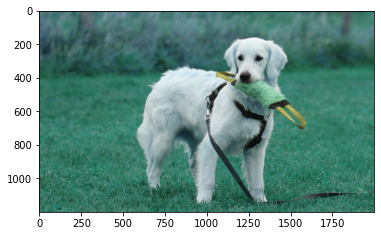

In [27]:
img = cv2.imread(dog, cv2.IMREAD_COLOR)
plt.imshow(img)

In [28]:
transform = A.Compose(
        [
            A.Resize(model_params.img_size,model_params.img_size),
            A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
            ToTensorV2(),
        ]
    )

In [29]:
img_tensor = transform(image=img)["image"]

In [34]:
img_tensor = img_tensor.unsqueeze(0)
img_tensor.size()

torch.Size([1, 3, 224, 224])

In [38]:
img_tensor = img_tensor.to(device)

In [39]:
with torch.no_grad():
    out = net(img_tensor)

In [40]:
out.size()

torch.Size([1, 1000])

In [42]:
pred_softmax = torch.log_softmax(out, dim=1)

tensor([[ -7401.7852,  -8333.0869, -12313.4922,  -7495.6250,  -5987.3813,
          -5626.2910,  -6612.2715,  -7469.7793,  -7766.7349,  -7778.0757,
         -11273.5498,  -7403.7285,  -7404.7368,  -7358.5884,  -7598.2446,
          -7796.1719,  -7405.6577,  -7722.7344,  -7293.4097,  -4254.8047,
          -7158.2344,  -7437.5957,  -7500.8013,  -4243.1284,  -8029.1982,
          -7743.4844,  -7415.3574,  -7665.9854,  -6765.8740,  -5809.4028,
          -7403.3423,  -7634.7788,  -8342.6367,  -6906.2510, -10626.2197,
          -7813.5059,  -7441.1826,  -9004.5830,  -7703.2983, -11175.2236,
          -7366.3589,  -5387.5078, -12546.0693,  -7363.1226, -12493.8574,
         -11277.4688,  -7413.4321,  -7374.7104,  -7438.1343,  -7261.4722,
          -7658.4434,  -7532.3975,  -7581.7510,  -7426.6016,  -7369.7402,
          -7516.3188,  -7794.0649,  -7648.6226,  -7619.9341,  -7393.9326,
          -7538.1958,  -7502.7368,  -7346.2510, -10954.6416,  -7500.5151,
          -4980.8384,  -7395.1743,  -7

In [43]:
_, preds = torch.max(pred_softmax, dim=1)

In [44]:
preds

tensor([521], device='cuda:0')

In [45]:
labels = {v:k for k,v in id_to_label.items()}

In [46]:
labels[521]

'n03133878 Crock Pot\n'

In [47]:
labels[522]

'n03134739 croquet ball\n'

In [48]:
labels[523]

'n03141823 crutch\n'

In [50]:
img = cv2.imread(cat, cv2.IMREAD_COLOR)
img_tensor = transform(image=img)["image"]
img_tensor = img_tensor.unsqueeze(0)
img_tensor = img_tensor.to(device)
with torch.no_grad():
    out = net(img_tensor)
pred_softmax = torch.log_softmax(out, dim=1)
_, preds = torch.max(pred_softmax, dim=1)
labels[int(preds)]

'n03133878 Crock Pot\n'

In [51]:
img = cv2.imread(car, cv2.IMREAD_COLOR)
img_tensor = transform(image=img)["image"]
img_tensor = img_tensor.unsqueeze(0)
img_tensor = img_tensor.to(device)
with torch.no_grad():
    out = net(img_tensor)
pred_softmax = torch.log_softmax(out, dim=1)
_, preds = torch.max(pred_softmax, dim=1)
labels[int(preds)]

'n03133878 Crock Pot\n'